In [2]:
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns

fragmenten_df = pd.read_csv('Data/fragments_data.csv')
birchFragmenten_df = fragmenten_df.copy()
# birchFragmenten_df.head()

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(birchFragmenten_df, test_size=0.3, random_state=42)
# test_data.head()

In [4]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import pandas as pd
from scipy.signal import stft
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

In [5]:
# Initialize the features and filenames lists
features = []
filenames = []

for fragment in test_data['fragment']:
    y, sr = librosa.load("audio_fragments/" + fragment, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)

    stft_librosa = librosa.stft(y, n_fft=1024, hop_length=512)
    stft_librosa_mean = np.mean(np.abs(stft_librosa))

    feature_vector = np.concatenate([mfcc_mean, chroma_mean, [stft_librosa_mean]])
    features.append(feature_vector)
    filenames.append(fragment)

features = np.array(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

distance_matrix = squareform(pdist(features, metric='euclidean'))


c:\Users\madel\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\madel\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\madel\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\madel\anaconda3\Lib\site-packages\

SVR Mean Squared Error: 2.3252
SVR R^2 Score: 0.3565


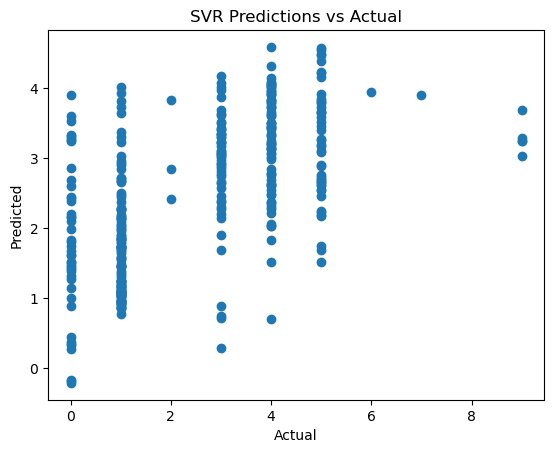

In [6]:
# ...existing code...

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Example: Suppose you want to predict the 'target_column' in test_data
# Replace 'target_column' with the actual column name you want to predict
y = test_data['label_numeric'].values

# Split features and target into train/test sets (here, using all test_data for simplicity)
# In practice, use train_data for training and test_data for testing
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

# Initialize and fit SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR Mean Squared Error: {mse:.4f}")
print(f"SVR R^2 Score: {r2:.4f}")

# Optional: Plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR Predictions vs Actual")
plt.show()
# ...existing code...

In [7]:
# Initialize the features and filenames lists
features = []
filenames = []

for fragment in test_data['fragment']:
    y, sr = librosa.load("audio_fragments/" + fragment, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    # chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    # chroma_mean = np.mean(chroma.T, axis=0)

    # stft_librosa = librosa.stft(y, n_fft=1024, hop_length=512)
    # stft_librosa_mean = np.mean(np.abs(stft_librosa))

    feature_vector = np.concatenate([mfcc_mean, chroma_mean, [stft_librosa_mean]])
    features.append(feature_vector)
    filenames.append(fragment)

features = np.array(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

distance_matrix = squareform(pdist(features, metric='euclidean'))


c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=974
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1527
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=360
  warnings.warn(


SVR Mean Squared Error: 2.2437
SVR R^2 Score: 0.3791


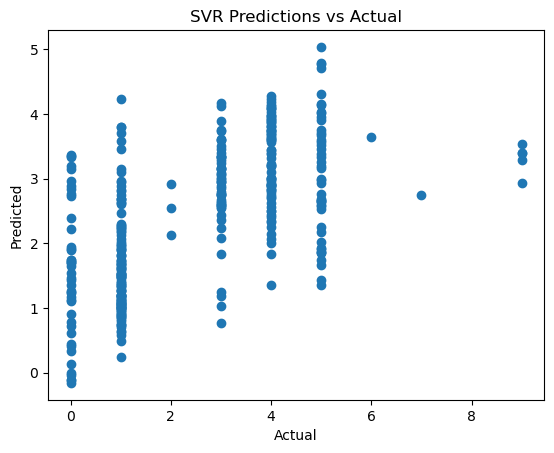

In [8]:
# ...existing code...

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Example: Suppose you want to predict the 'target_column' in test_data
# Replace 'target_column' with the actual column name you want to predict
y = test_data['label_numeric'].values

# Split features and target into train/test sets (here, using all test_data for simplicity)
# In practice, use train_data for training and test_data for testing
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

# Initialize and fit SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR Mean Squared Error: {mse:.4f}")
print(f"SVR R^2 Score: {r2:.4f}")

# Optional: Plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR Predictions vs Actual")
plt.show()
# ...existing code...

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Cross-validated SVR Mean Squared Error: 1.2633
Cross-validated SVR R^2 Score: 0.6433


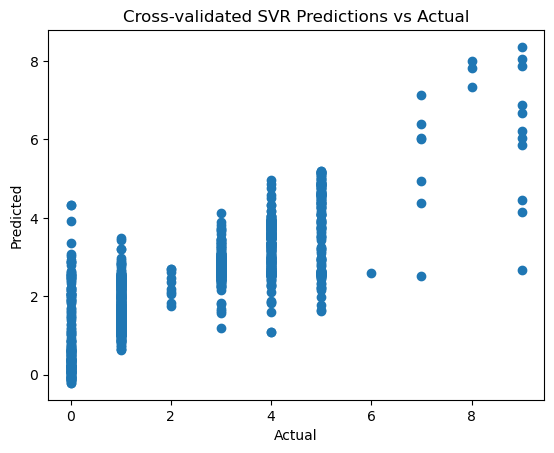

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Use your numeric target
y = test_data['label_numeric'].values

# Grid of parameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# GridSearchCV with 5-fold cross-validation
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(features, y)

print("Best parameters:", grid_search.best_params_)

# Cross-validated predictions
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(grid_search.best_estimator_, features, y, cv=5)

# Evaluate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Cross-validated SVR Mean Squared Error: {mse:.4f}")
print(f"Cross-validated SVR R^2 Score: {r2:.4f}")

plt.scatter(y, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Cross-validated SVR Predictions vs Actual")
plt.show()

Cross-validated SVR Mean Squared Error: 1.2633
Cross-validated SVR R^2 Score: 0.6433


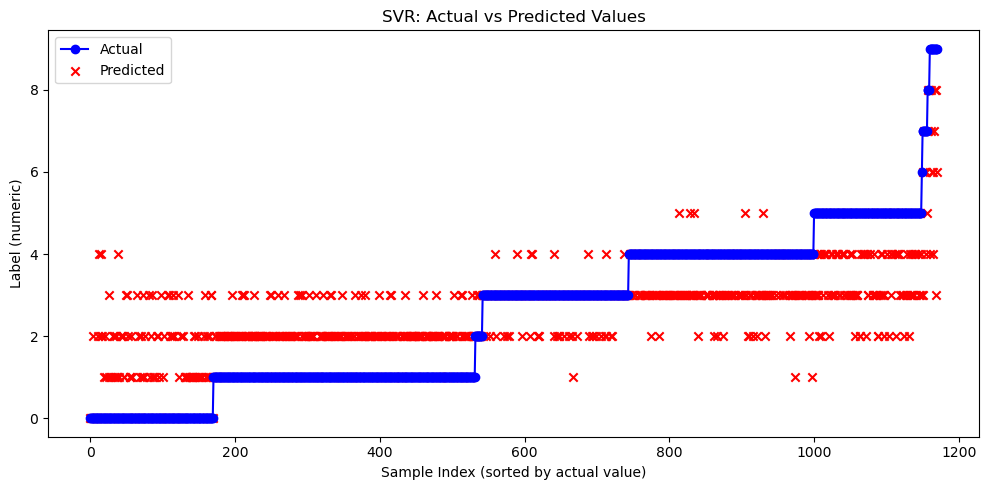

In [10]:
import numpy as np

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Cross-validated SVR Mean Squared Error: {mse:.4f}")
print(f"Cross-validated SVR R^2 Score: {r2:.4f}")

# Sort for better visualization
sorted_idx = np.argsort(y)
y_sorted = y[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]
y_pred_sorted = np.round(y_pred_sorted).astype(int)


plt.figure(figsize=(10,5))
plt.plot(np.arange(len(y)), y_sorted, label='Actual', marker='o', linestyle='-', color='b')
plt.scatter(np.arange(len(y_pred)), y_pred_sorted, label='Predicted', marker='x', color='r')
plt.xlabel("Sample Index (sorted by actual value)")
plt.ylabel("Label (numeric)")
plt.title("SVR: Actual vs Predicted Values")
plt.legend()
plt.tight_layout()
plt.show()

Cross-validated SVR Mean Squared Error: 1.2633
Cross-validated SVR R^2 Score: 0.6433


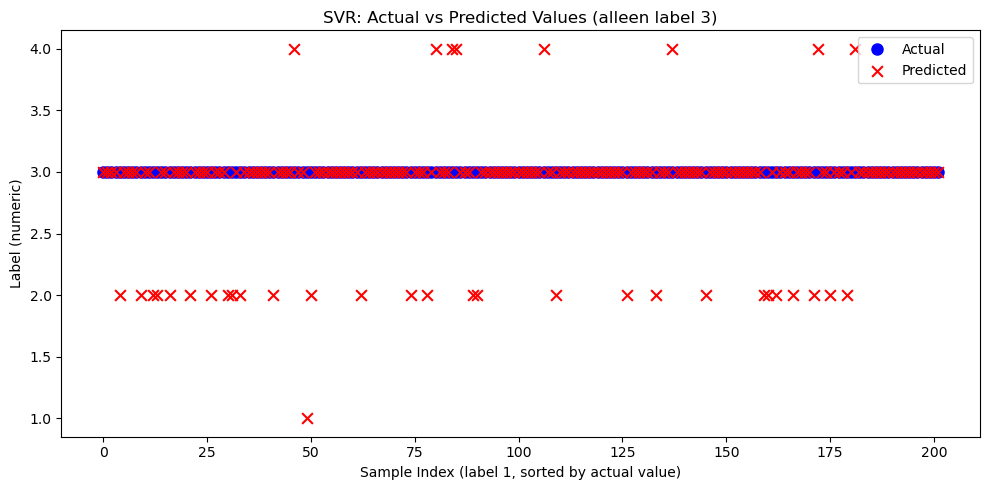

In [11]:
import numpy as np

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Cross-validated SVR Mean Squared Error: {mse:.4f}")
print(f"Cross-validated SVR R^2 Score: {r2:.4f}")

# Filter only samples where the true label is 1
mask = y == 3
y_label1 = y[mask]
y_pred_label1 = y_pred[mask]
y_pred_label1 = np.round(y_pred_label1).astype(int)

# Sort for better visualization
sorted_idx = np.argsort(y_label1)
y_sorted = y_label1[sorted_idx]
y_pred_sorted = y_pred_label1[sorted_idx]

plt.figure(figsize=(10,5))
plt.plot(np.arange(len(y_sorted)), y_sorted, label='Actual', marker='o', linestyle='', color='b', markersize=8)
plt.scatter(np.arange(len(y_pred_sorted)), y_pred_sorted, label='Predicted', marker='x', color='r', s=60, zorder=3)
plt.xlabel("Sample Index (label 1, sorted by actual value)")
plt.ylabel("Label (numeric)")
plt.title("SVR: Actual vs Predicted Values (alleen label 3)")
plt.legend()
plt.tight_layout()
plt.show()

Accuracy: 0.46875
              precision    recall  f1-score   support

           0       0.43      0.59      0.50        44
           1       0.62      0.59      0.60       122
           2       0.00      0.00      0.00         3
           3       0.28      0.36      0.31        53
           4       0.49      0.54      0.52        76
           5       0.29      0.15      0.20        47
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         5

    accuracy                           0.47       352
   macro avg       0.23      0.25      0.24       352
weighted avg       0.46      0.47      0.46       352



c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


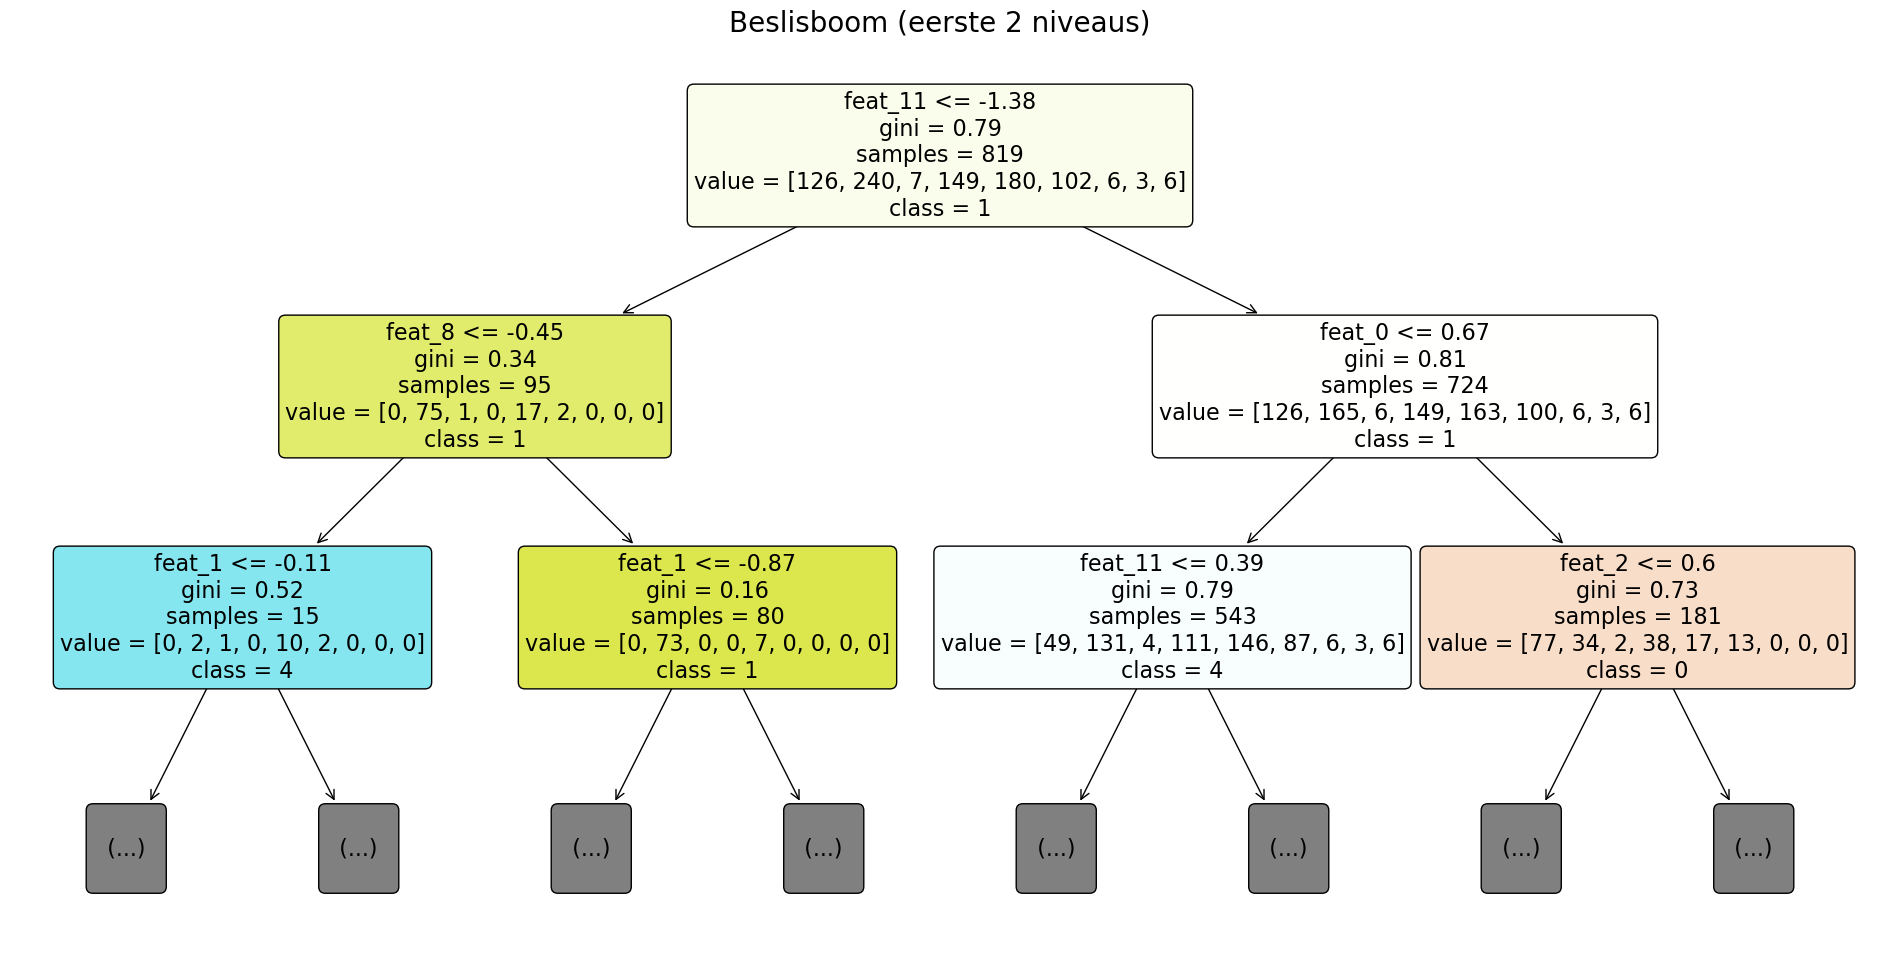

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Gebruik dezelfde features en labels
y = test_data['label_numeric'].values

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

# Train Decision Tree
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)

# Voorspel
y_pred = tree.predict(X_test)

# Evaluatie
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot de boom (optioneel)
plt.figure(figsize=(24, 12))  # Vergroot het figuur
plot_tree(
    tree,
    feature_names=[f'feat_{i}' for i in range(features.shape[1])],
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    max_depth=2,
    fontsize=16,           # Grotere tekst in de boxen
    rounded=True,          # Mooier afgeronde boxen
    proportion=False,      # Boxen niet schalen op aantal samples
    precision=2            # Aantal decimalen in de boxen
)
plt.title("Beslisboom (eerste 2 niveaus)", fontsize=20)
plt.show()